## Problem 2

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from least_squares import least_squares

In order to group our nebulae, we make use of the catalogue tool located at [http://spider.seds.org/ngc/ngc.html]. After manually plugging in all 24 nebulae in this catalogue, we categorize them into 9 groups according to their proximity to one another much like Hubble originally did. The grouping that I believe he chose is as follows:

Group 1: S.Mag

Group 2: L.Mag

Group 3: N.G.C. 6822

Group 4: 1068

Group 5: 3031

Group 6: 7331

Group 7: 221, 224, 598

Group 8: 3627, 4382, 4472, 4486, 4649, 5236

Group 9: 4151, 4214, 4258, 4449, 4736, 4826, 5055, 5194, 5457

Once again, in order to create these nine groups I grouped the nebulae according to their relative distances as well as to their catalogue number since they seem to be directly related to the relative distance. Within each group, we now take the average of the measured velocities as well as of their distances. These values are given by:

$$v_{1} = 170.00, v_{2} = 290.00, v_{3} = -130.00, v_{4} = 920.00, v_{5} = -30.00, v_{6} = 500.00, v_{7} = -158.33, v_{8} = 731.67, v_{9} = 368.89$$

$$r_{1} = 0.03, r_{2} = 0.03, r_{3} = 0.21, r_{4} = 1.00, r_{5} = 0.90, r_{6} = 1.10, r_{7} = 0.27, r_{8} = 1.63, r_{9} = 0.89$$

All velocities are in km/sec and all distances are in $10^{6}$ parsecs. At this point I'm not sure if I have acquired the correct data points or if my procedure is correct since these points seem to be different from the plotted values on the Hubble paper.

 Least-squares fit of 9 data points
 -----------------------------------
 Hubble's constant slope   b = 444.73 +/- 190.99  km/s/Mpc
 Intercept with r axis     a =  -3.65 +/- 163.41  km/s
 Estimated v error bar sigma = 302.4 km/s


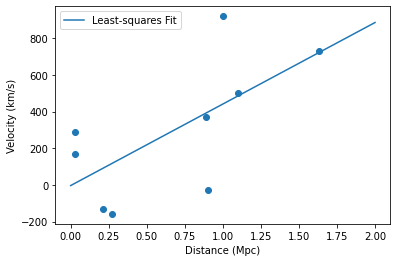

In [2]:
# distances in Mpc
r = np.array([0.03, 0.03, 0.21, 1.00, 0.90, 1.10, 0.27, 1.63, 0.89])

# velocities in km/s
v = np.array([170.00, 290.00, -130.00, 920.00, -30.00, 500.00, -158.33, 731.67, 368.89])

n = len(r)   # number of galaxies

if n <= 2 :
    print ('Error! Need at least two data points!')
    exit()

# Use our least-squares fit
[a, b, sigma, sigma_a, sigma_b] = least_squares(r,v)

# Print out results
print (' Least-squares fit of', n, 'data points')
print (' -----------------------------------')
print (" Hubble's constant slope   b = {0:6.2f} +/- {1:6.2f}  km/s/Mpc".format( b, sigma_b))
print (" Intercept with r axis     a = {0:6.2f} +/- {1:6.2f}  km/s".format( a, sigma_a))
print (' Estimated v error bar sigma =', round(sigma, 1), 'km/s')

rvals = np.linspace(0., 2.0, 21)
f = a + b * rvals

plt.scatter( r, v)
plt.plot( rvals, f , label="Least-squares Fit")
plt.figure(1)
plt.xlabel("Distance (Mpc)")
plt.ylabel("Velocity (km/s)")
plt.legend()

plt.show()

With this data at hand, we can now calculate the age of the universe; all we need are the conversion factors between Mpc to km and between years to seconds. The result is:

In [3]:
distance_conversion = 3.086e19
time_conversion = 3.154e+7
t = distance_conversion/ b / time_conversion
sigma_t = (sigma_b)/b * t
print("The age of the universe is: %6.2e +/- %6.2e years." % (t, sigma_t))

The age of the universe is: 2.20e+09 +/- 9.45e+08 years.


Compared to the accepted value of 1.37e10 years, we see that our value for the age of the universe is off by an order of magnitude. This might be due to the grouping I chose, though I'm not 100% sure.